<a href="https://colab.research.google.com/github/bobrowskijan/UEP/blob/main/ML_15_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
data = datasets.load_iris()

In [ ]:
iris = data
X = iris.data
y = iris.target
feature_names = iris.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

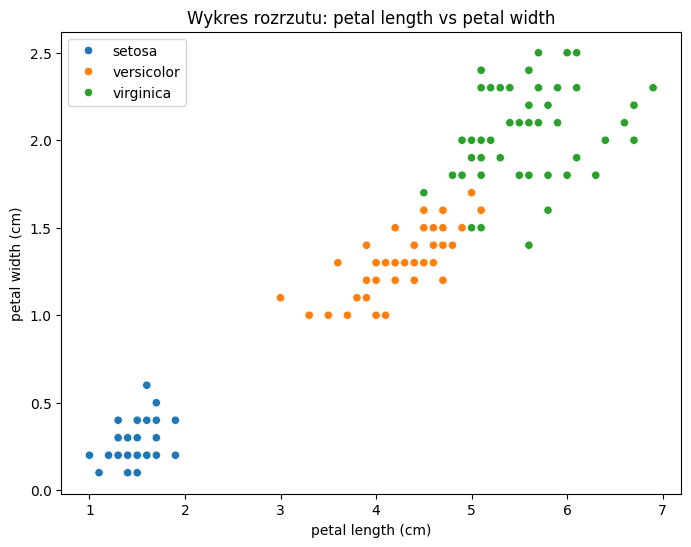

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)", hue=iris.target_names[df['target']])
plt.title("Wykres rozrzutu: petal length vs petal width")
plt.show()


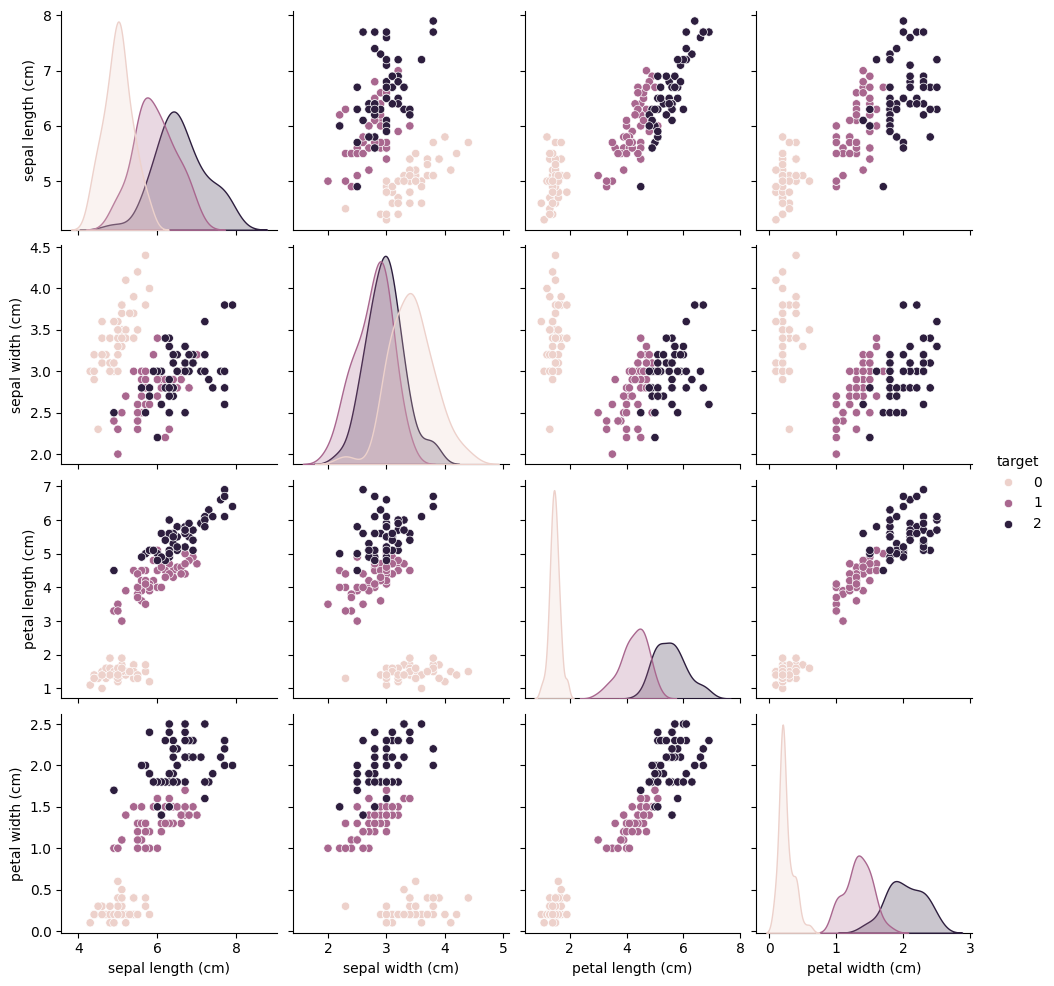

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='target')
plt.show()


In [ ]:
import numpy as np

def entropy(labels):
    probs = np.bincount(labels) / len(labels)
    return -np.sum(probs[probs > 0] * np.log2(probs[probs > 0]))


def information_gain(X_column, y, threshold):
    parent_entropy = entropy(y)

    left_mask = X_column <= threshold
    right_mask = X_column > threshold

    n = len(y)
    n_left = np.sum(left_mask)
    n_right = np.sum(right_mask)

    if n_left == 0 or n_right == 0:
        return 0

    left_entropy = entropy(y[left_mask])
    right_entropy = entropy(y[right_mask])

    child_entropy = (n_left / n) * left_entropy + (n_right / n) * right_entropy

    return parent_entropy - child_entropy


In [ ]:
X_petal_width = df['petal width (cm)'].values
y_labels = df['target'].values

ig_1_5 = information_gain(X_petal_width, y_labels, 1.5)
ig_038 = information_gain(X_petal_width, y_labels, 0.38)

print(f"Zysk informacyjny dla podziału na poziomie 1.5: {ig_1_5:.4f}")
print(f"Zysk informacyjny dla podziału na poziomie 0.38: {ig_038:.4f}")


Zysk informacyjny dla podziału na poziomie 1.5: 0.6656
Zysk informacyjny dla podziału na poziomie 0.38: 0.6195


In [ ]:
from sklearn.model_selection import train_test_split # Importing the required function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Importing the DecisionTreeClassifier class
from sklearn.metrics import accuracy_score # Importing the accuracy_score function

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
tree_preds = tree_clf.predict(X_test)
tree_acc = accuracy_score(y_test, tree_preds)
print(f"Dokładność drzewa decyzyjnego: {tree_acc:.4f}")

Dokładność drzewa decyzyjnego: 1.0000


In [ ]:
from sklearn.ensemble import RandomForestClassifier # Importing the RandomForestClassifier class
from sklearn.metrics import accuracy_score # Importing the accuracy_score function

forest_clf = RandomForestClassifier(n_estimators=15, random_state=42)
forest_clf.fit(X_train, y_train)
forest_preds = forest_clf.predict(X_test)
forest_acc = accuracy_score(y_test, forest_preds)
print(f"Dokładność lasu losowego (15 drzew): {forest_acc:.4f}")


Dokładność lasu losowego (15 drzew): 1.0000


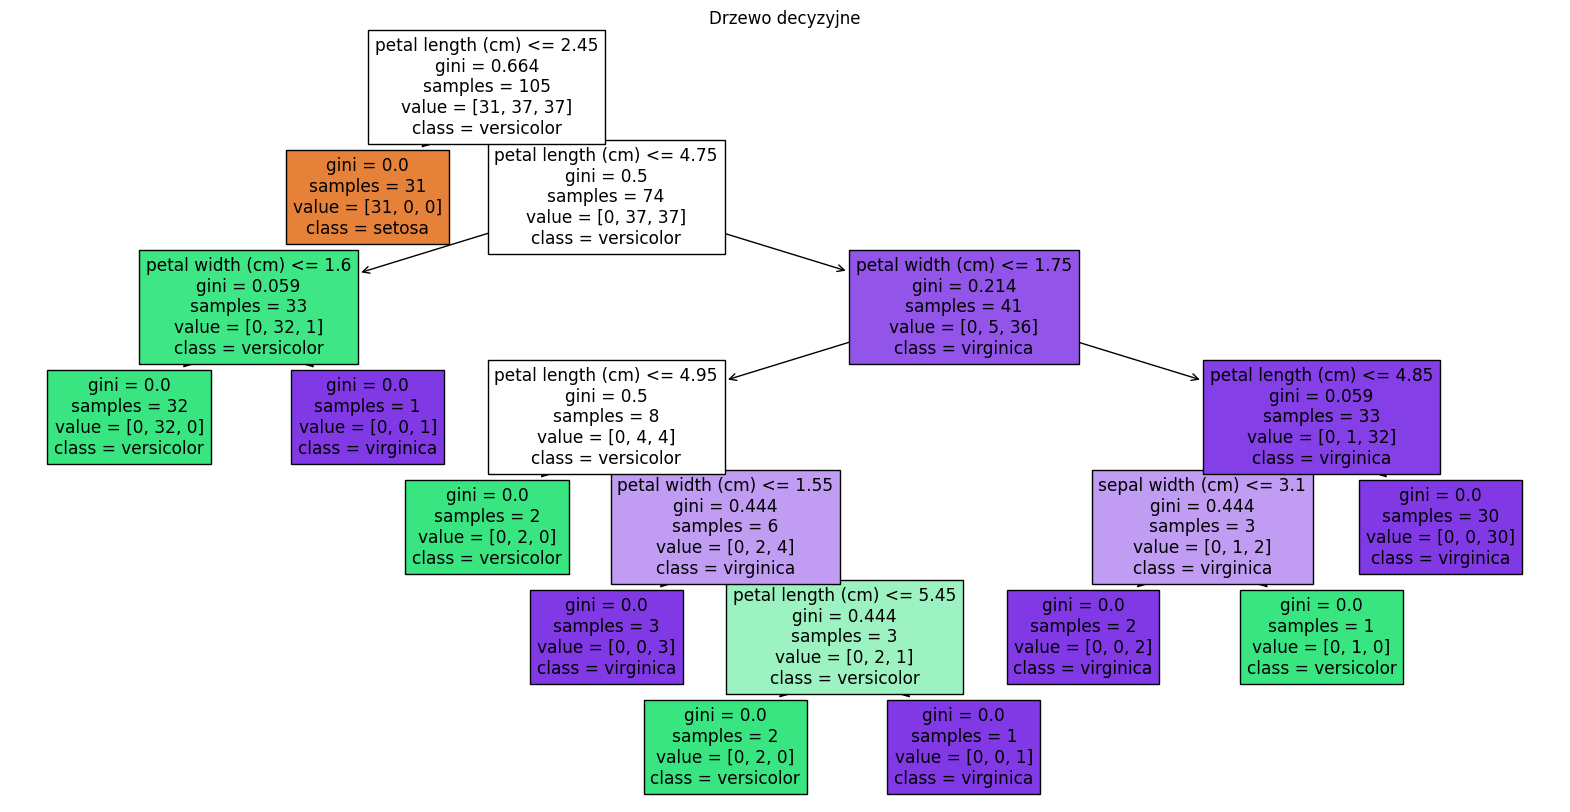

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree_clf,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True)
plt.title("Drzewo decyzyjne")
plt.show()


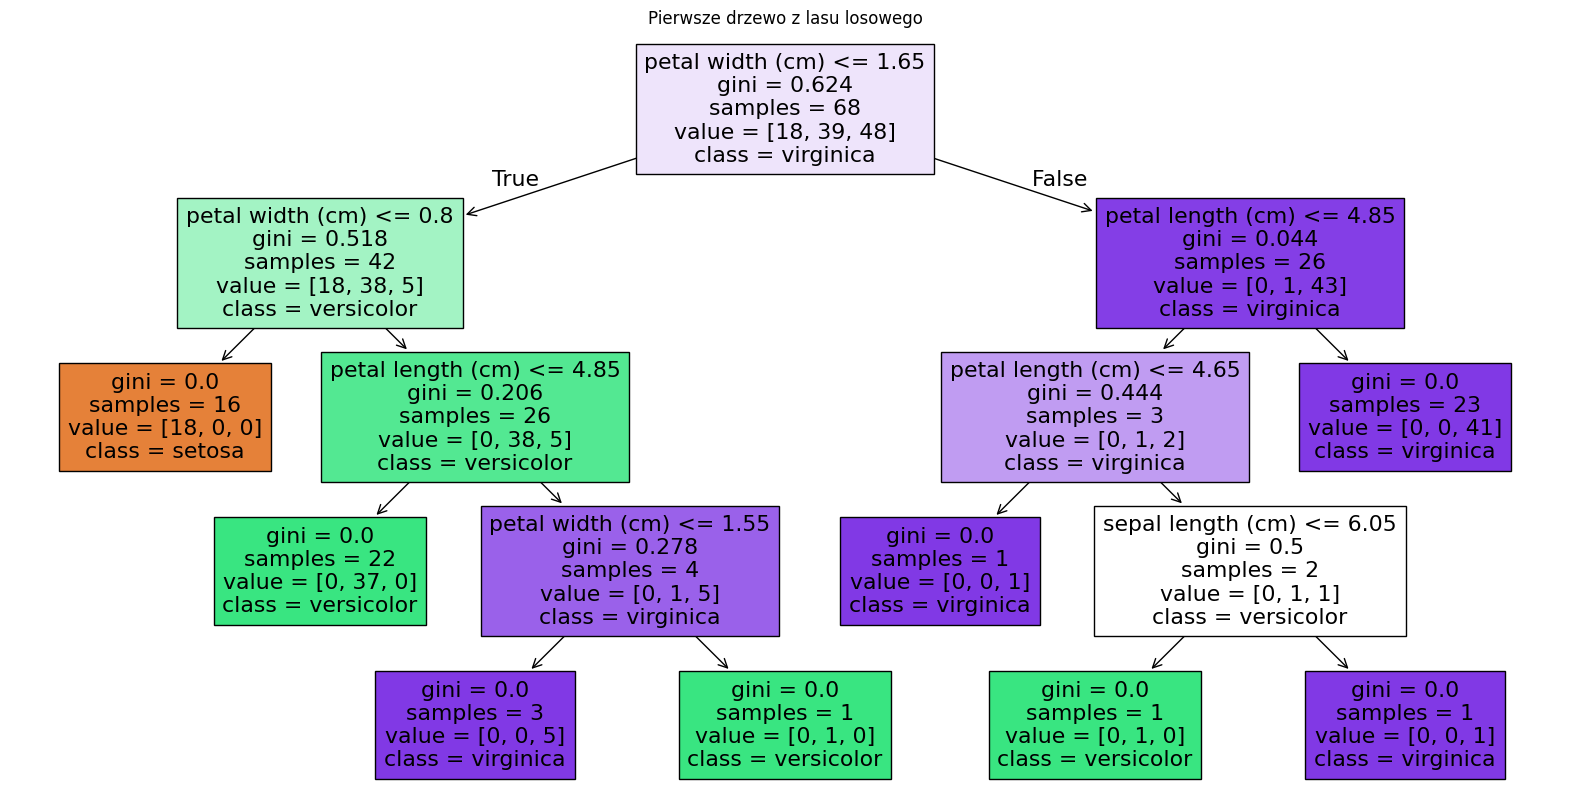

In [ ]:
# Wybierz pierwsze drzewo z lasu (np. 0)
estimator = forest_clf.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(estimator,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True)
plt.title("Pierwsze drzewo z lasu losowego")
plt.show()
